In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Удаление дубликатов в данных

In [144]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4],
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [145]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [146]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [147]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [148]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [149]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [150]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [151]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [152]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan],
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [153]:
data.dropna()

,0,1,2,3


In [154]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [155]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [156]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [157]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,1.924601,NaN,NaN
1,-0.443778,NaN,NaN
2,-1.279834,NaN,0.487799
3,0.672669,NaN,-0.179156
4,-0.708392,1.087898,0.453745
5,0.673065,-1.409978,0.386448
6,1.696641,-0.580191,1.163504


In [158]:
df.fillna(0)

,0,1,2
0,1.924601,0.000000,0.000000
1,-0.443778,0.000000,0.000000
2,-1.279834,0.000000,0.487799
3,0.672669,0.000000,-0.179156
4,-0.708392,1.087898,0.453745
5,0.673065,-1.409978,0.386448
6,1.696641,-0.580191,1.163504


In [159]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.924601,0.500000,0.000000
1,-0.443778,0.500000,0.000000
2,-1.279834,0.500000,0.487799
3,0.672669,0.500000,-0.179156
4,-0.708392,1.087898,0.453745
5,0.673065,-1.409978,0.386448
6,1.696641,-0.580191,1.163504


In [160]:
df.fillna(method="bfill")

,0,1,2
0,1.924601,1.087898,0.487799
1,-0.443778,1.087898,0.487799
2,-1.279834,1.087898,0.487799
3,0.672669,1.087898,-0.179156
4,-0.708392,1.087898,0.453745
5,0.673065,-1.409978,0.386448
6,1.696641,-0.580191,1.163504


In [161]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,1.924601,NaN,0.487799
1,-0.443778,NaN,0.487799
2,-1.279834,1.087898,0.487799
3,0.672669,1.087898,-0.179156
4,-0.708392,1.087898,0.453745
5,0.673065,-1.409978,0.386448
6,1.696641,-0.580191,1.163504


In [162]:
df.fillna(data.mean())

,0,1,2
0,1.924601,6.500000,3.000000
1,-0.443778,6.500000,3.000000
2,-1.279834,6.500000,0.487799
3,0.672669,6.500000,-0.179156
4,-0.708392,1.087898,0.453745
5,0.673065,-1.409978,0.386448
6,1.696641,-0.580191,1.163504


In [163]:
df.fillna(data.median())

,0,1,2
0,1.924601,6.500000,3.000000
1,-0.443778,6.500000,3.000000
2,-1.279834,6.500000,0.487799
3,0.672669,6.500000,-0.179156
4,-0.708392,1.087898,0.453745
5,0.673065,-1.409978,0.386448
6,1.696641,-0.580191,1.163504


Медиана более устойчива к выбросам

In [164]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)

data_all = np.array(data_all)

<AxesSubplot:>

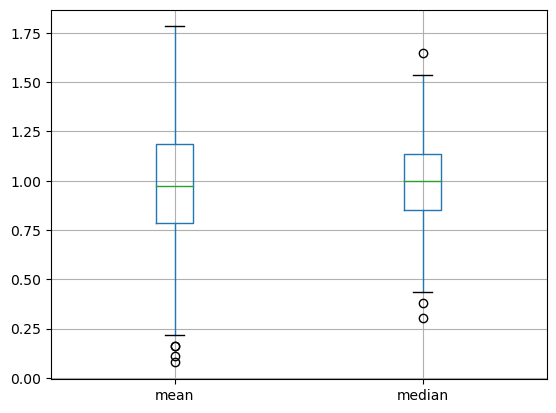

In [165]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [166]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,1.924601,NaN,NaN,1
1,-0.443778,NaN,NaN,1
2,-1.279834,NaN,0.487799,0
3,0.672669,NaN,-0.179156,0
4,-0.708392,1.087898,0.453745,0
5,0.673065,-1.409978,0.386448,0
6,1.696641,-0.580191,1.163504,0


Замена значений

In [167]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [168]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [169]:
data = pd.Series(["male"]*10 + ["female"]*5)
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [170]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [171]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [172]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [173]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ...

In [174]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [175]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [176]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [177]:
from sklearn.preprocessing import PolynomialFeatures

In [178]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [179]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

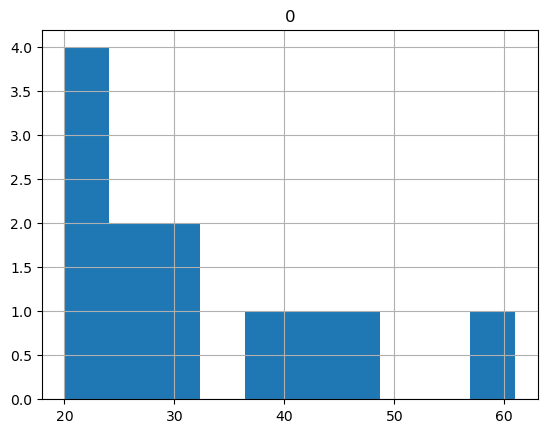

In [180]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [181]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [182]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [183]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [184]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\An_to\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

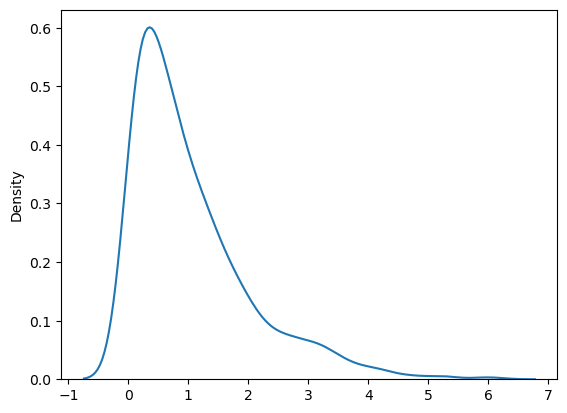

In [185]:
from scipy. stats import boxcox

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\An_to\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

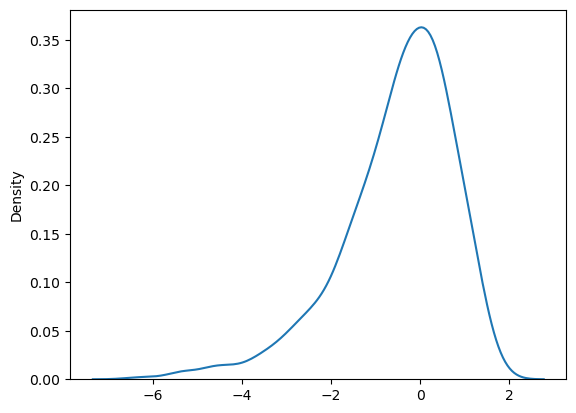

In [186]:
transformed_data = np.log(data)
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\An_to\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

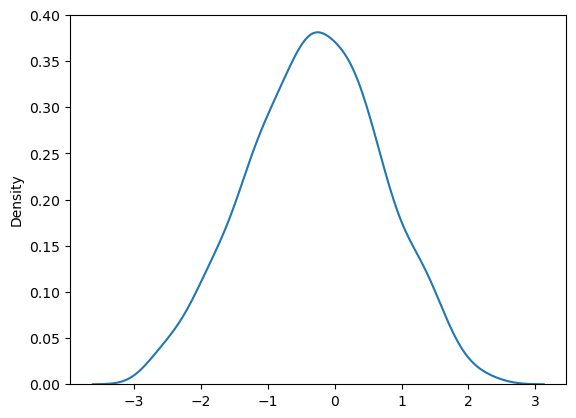

In [187]:
transformed_data, best_lambda = boxcox(data)

sns.distplot(transformed_data, hist=False , kde=True)

In [188]:
best_lambda

0.29645107418588684

# Домашнее задание

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [3]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [5]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
reg = LinearRegression().fit(train_X, train_y)

In [7]:
reg.score(train_X, train_y)

0.4555406785040048

In [8]:
mean_squared_error(reg.predict(train_X), train_y)

29840.1212508653

In [9]:
scores = cross_validate(reg, train_X, train_y, cv=3,
                        scoring=('neg_mean_squared_error'))

In [10]:
scores

{'fit_time': array([0.02002668, 0.01801705, 0.01800346]),
 'score_time': array([0.00400138, 0.00398993, 0.00300145]),
 'test_score': array([-29836.8590711 , -29618.75539267, -30344.6536926 ])}

In [11]:
mean_squared_error(reg.predict(test_X), test_y)

31021.02439985445

Такая большая ошибка объяснена тем, что в модель включены все факторы из датасета. Отберем факторы, которые наиболее связаны с target

In [12]:
df.corr(method='kendall')['target'].sort_values(ascending=False)

target                            1.000000
configurations_tank-volume        0.472369
configurations_back-wheel-base    0.460047
weight                            0.435184
cylinders-value                   0.398461
cylinders-order                   0.281705
configurations_seats              0.246602
max-speed                         0.200088
configurations_front-brake        0.194505
engine-start                      0.187190
consumption-mixed                 0.123697
models_male                       0.093034
charge-time                       0.087876
configurations_auto-premiere      0.086189
engine-stop                       0.083905
supergen_year-stop                0.074642
compression                       0.074231
luxury                            0.069948
models_light-and-commercial       0.058547
gear-type                         0.056948
supply-system                     0.050004
engine-feeding                    0.046324
power-electro-kw                  0.035067
models_coun

Был использован коэффициент корреляции Кендалла, так как он устойчив к выбросам и распределению. Результирующий фактор тесно связан со следующими показателями: configurations_tank-volume, configurations_back-wheel-base, weight, cylinders-value. Именно эти факторы будут включены в будущую модель.

In [13]:
# создадим новый датасет с фактором-результатом и факторами-признаками
df_new = df[['target', 'configurations_tank-volume', 'configurations_back-wheel-base', 'weight', 'cylinders-value']]
df_new

,target,configurations_tank-volume,configurations_back-wheel-base,weight,cylinders-value
0,2360,40.0,1300.0,820.0,3
1,3060,108.0,1555.0,2350.0,7
2,2648,55.0,1534.0,1350.0,4
3,2513,55.0,1495.0,1090.0,4
4,2703,62.0,1515.0,1410.0,4
...,...,...,...,...,...
43240,2510,47.0,1425.0,-1.0,4
43241,2808,65.0,1551.0,1545.0,4
43242,2520,55.0,1460.0,1210.0,4
43243,2755,70.0,1548.0,1660.0,5


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   target                          43245 non-null  int64  
 1   configurations_tank-volume      43245 non-null  float64
 2   configurations_back-wheel-base  43245 non-null  float64
 3   weight                          43245 non-null  float64
 4   cylinders-value                 43245 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.6 MB


Пропусков нет, посмотрим на выбросы и распределение.

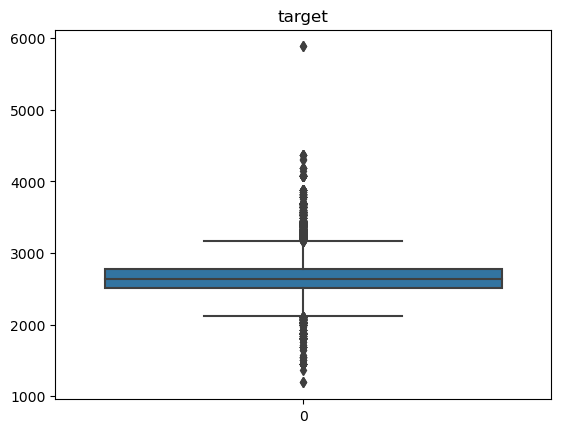

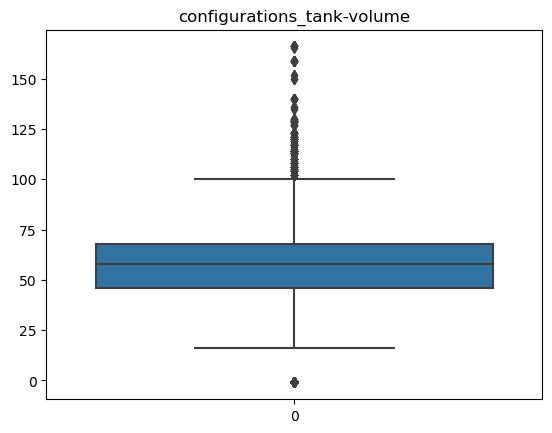

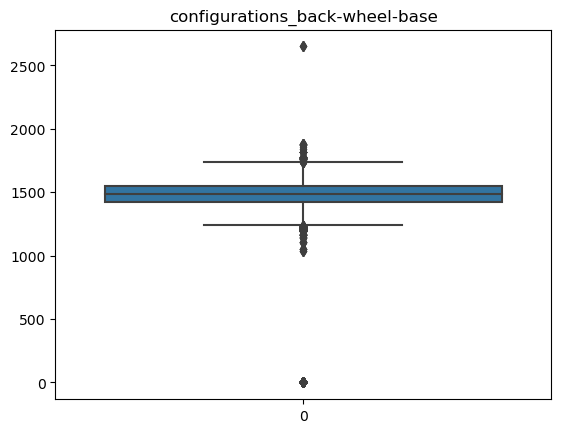

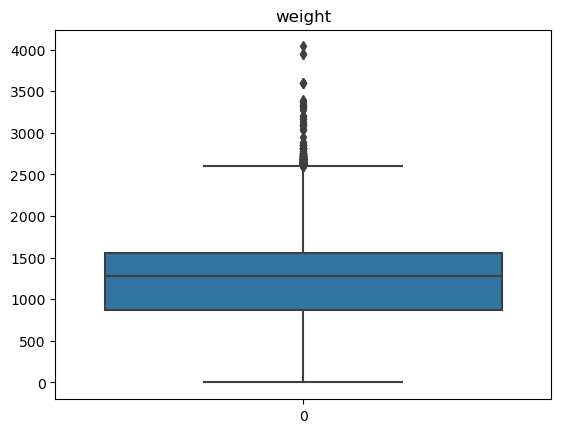

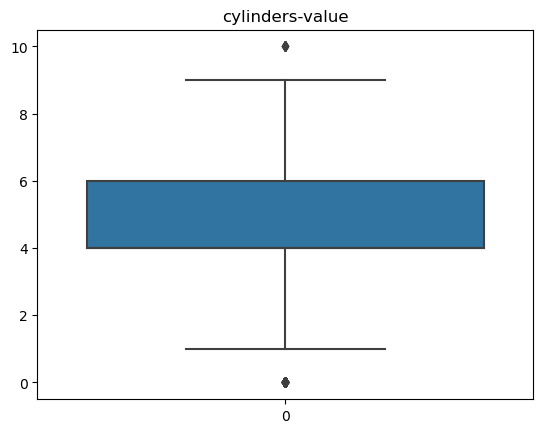

In [15]:
for i in df_new.columns:
    plt.figure()
    sns.boxplot(data=df_new[i])
    plt.title(i)
    plt.show()

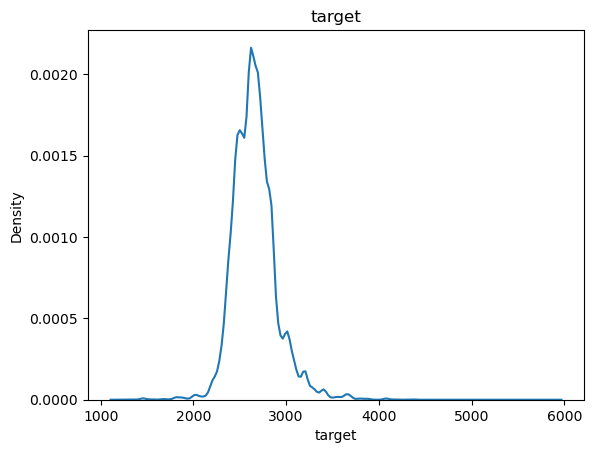

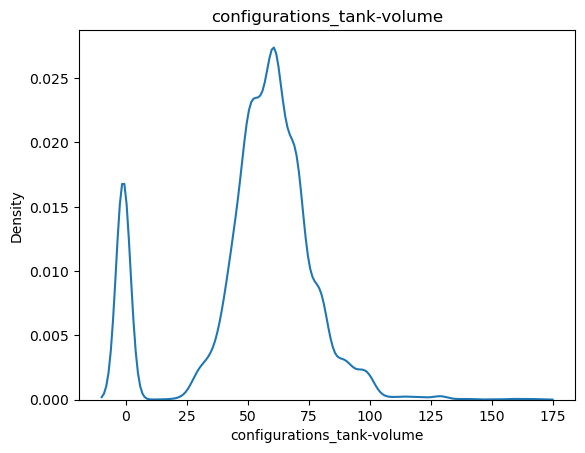

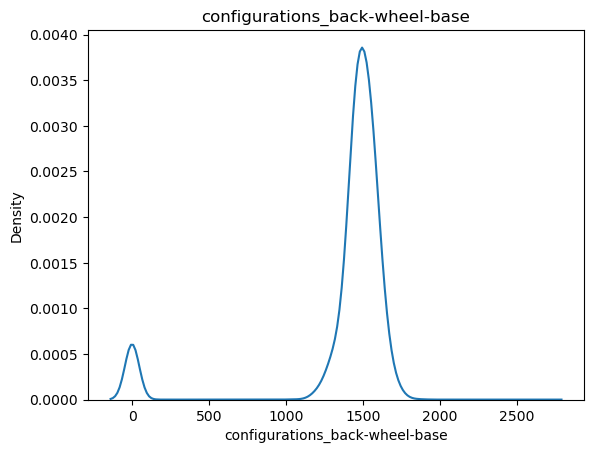

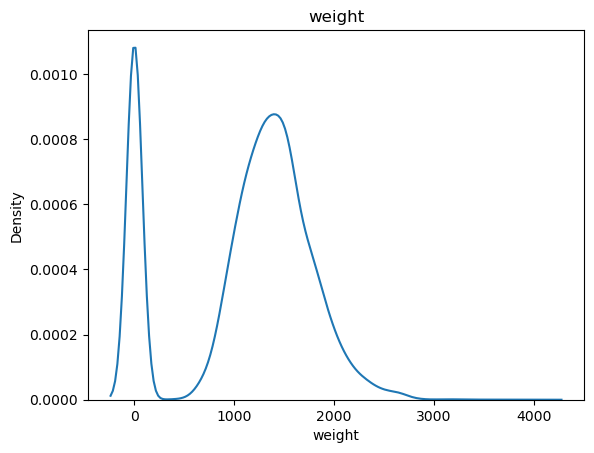

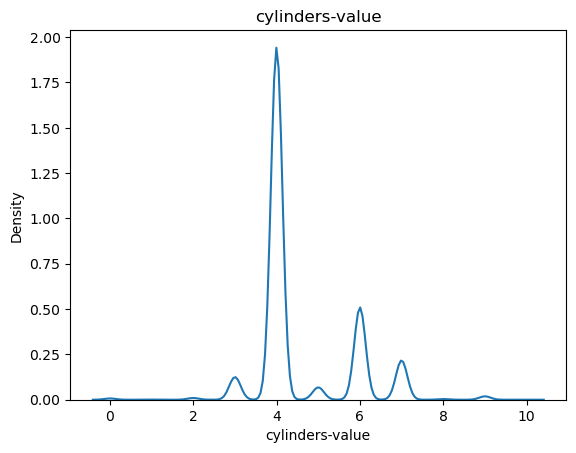

In [16]:
for i in df_new.columns:
    plt.figure()
    sns.kdeplot(data=df_new[i])
    plt.title(i)
    plt.show()

В каждом столбце много выбросов, а распределение не напоминает нормальное. Попробуем с этим что-то сделать, применив стандартизацию и регулязацию.

In [32]:
# импортируем библиотеки
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [33]:
# разбиваем данные на факторы-признаки и фактор-результат
X = df_new.drop(["target"], axis=1)
y = df_new[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# стандартизация
scaler = StandardScaler()
x_train_st = scaler.fit_transform(train_X)
x_test_st = scaler.fit_transform(test_X)

In [45]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn import metrics

# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(x_train_st, train_y)

print(model.coef_, model.intercept_)

# делаем прогнозы
predictions = model.predict(x_test_st)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'R2 Score {r2_score(test_y, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(test_y, predictions))}')

[[ 63.82503323 -28.55345844  36.30425831  82.93406166]] [2659.80976047]
R2 Score 0.33584989094313433
RMSE: 196.16968930740956


Коэффициент детерминации всё еще очень низкий. Среднеквадратическая ошибка хоть и уменьшилась по сравнению с прошлыми результатами, но всё еще очень высока. Попробуем использовать другие методы.

##### Дерево решений
Используем дерево регрессии для решения задачи регрессии, так как наш фактор-результат непрерывный. 

In [88]:
# испортируем библиотеку
from sklearn.tree import DecisionTreeRegressor

In [89]:
dtree = DecisionTreeRegressor(random_state=101)

In [90]:
# обучаем
dtree = dtree.fit(train_X,train_y)

In [91]:
predictions_train = dtree.predict(test_X)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(test_y,predictions_train)))
print('R2 Score : ', r2_score(test_y,predictions_train))

RMSE :  113.30975089740508
R2 Score :  0.778416708461606


Коэффициент детерминации намного улучшился, модель достаточно качественная, если судить по RMSE и R2. Попробуем еще один спосов - метод случайного дерева.

In [92]:
# испортируем библиотеки
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [93]:
clf_rf = RandomForestRegressor()
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [94]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [95]:
grid_search_cv_clf.fit(train_X, train_y)

C:\Users\An_to\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\An_to\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\An_to\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\An_to\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [96]:
best_clf = grid_search_cv_clf.best_estimator_

In [97]:
best_clf.score(test_X, test_y)

0.761526140597212

In [103]:
predictions = best_clf.predict(test_X)

print(f'RMSE: {np.sqrt(metrics.mean_squared_error(test_y, predictions))}')
print('R2 Score:', r2_score(test_y, predictions))

RMSE: 117.54906261767997
R2 Score: 0.761526140597212


При этом методе коэф-т детерминации получился чуть меньше, а среднеквадратическая ошибка - больше. Из всех вариантов лучшим оказался метод **регрессионной модели дерева решений.**